## Imports

In [1]:
from keras.layers import Dense
from tensorflow.keras import regularizers
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import scipy.sparse 
from matplotlib import pyplot as plt

## Loading Data

### ClinicalBERT Pooled Embeddings

In [3]:
embeddings = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_ClinicalBERT_pooled_embeddings_68k.npy')
labels = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_ClinicalBERT_pooled_labels_68k.npy')


In [4]:
train_X, test_X, train_y, test_y = train_test_split(embeddings, labels, test_size=0.20, random_state=42, stratify=labels)
del embeddings
del labels

In [5]:
train_X.shape

(54200, 768)

In [6]:
test_X.shape

(13550, 768)

## Define Keras Model

In [3]:
inputs = tf.keras.layers.Input(shape=(train_X.shape[1],))
classification_out = tf.keras.layers.Dense(4, activation='softmax')(inputs)

model_functional = tf.keras.models.Model(inputs=inputs, outputs = classification_out)
model_functional.compile(loss='SparseCategoricalCrossentropy', 
                         optimizer='adam', 
                         metrics=['sparse_categorical_accuracy'])


In [5]:
model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 768)]             0         
                                                                 
 dense (Dense)               (None, 4)                 3076      
                                                                 
Total params: 3,076
Trainable params: 3,076
Non-trainable params: 0
_________________________________________________________________


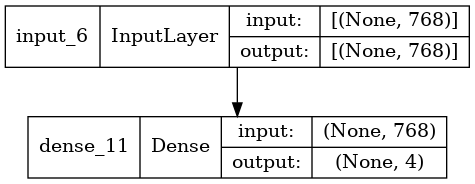

In [36]:
tf.keras.utils.plot_model(model_functional, show_shapes = True)


In [37]:
train = model_functional.fit(train_X, train_y, epochs=50, validation_split=0.2)


Epoch 1/50
1355/1355 [==============================] - 3s 2ms/step - loss: 1.4138 - sparse_categorical_accuracy: 0.2489 - val_loss: 1.4278 - val_sparse_categorical_accuracy: 0.2504
Epoch 2/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4156 - sparse_categorical_accuracy: 0.2531 - val_loss: 1.4013 - val_sparse_categorical_accuracy: 0.2494
Epoch 3/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4121 - sparse_categorical_accuracy: 0.2538 - val_loss: 1.4033 - val_sparse_categorical_accuracy: 0.2527
Epoch 4/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4118 - sparse_categorical_accuracy: 0.2555 - val_loss: 1.4133 - val_sparse_categorical_accuracy: 0.2478
Epoch 5/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4124 - sparse_categorical_accuracy: 0.2538 - val_loss: 1.4193 - val_sparse_categorical_accuracy: 0.2482
Epoch 6/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4150 - spars

Epoch 46/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4048 - sparse_categorical_accuracy: 0.2643 - val_loss: 1.4484 - val_sparse_categorical_accuracy: 0.2552
Epoch 47/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4048 - sparse_categorical_accuracy: 0.2647 - val_loss: 1.4105 - val_sparse_categorical_accuracy: 0.2482
Epoch 48/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4054 - sparse_categorical_accuracy: 0.2667 - val_loss: 1.4688 - val_sparse_categorical_accuracy: 0.2482
Epoch 49/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4057 - sparse_categorical_accuracy: 0.2670 - val_loss: 1.4046 - val_sparse_categorical_accuracy: 0.2474
Epoch 50/50
1355/1355 [==============================] - 2s 2ms/step - loss: 1.4054 - sparse_categorical_accuracy: 0.2671 - val_loss: 1.3956 - val_sparse_categorical_accuracy: 0.2530


In [38]:
test = model_functional.evaluate(test_X, test_y)


424/424 [==============================] - 0s 1ms/step - loss: 1.3947 - sparse_categorical_accuracy: 0.2545


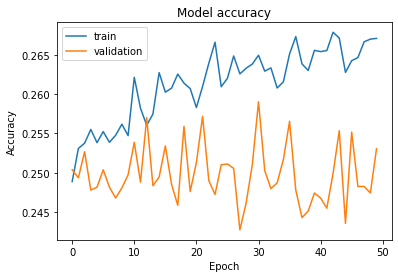

In [39]:
plt.plot(train.history['sparse_categorical_accuracy'])
plt.plot(train.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Hardly any learning at all, very unstable. Might need to increase learning rate.

---

In [42]:
inputs = tf.keras.layers.Input(shape=(train_X.shape[1],))
classification_out = tf.keras.layers.Dense(4, activation='softmax')(inputs)

model_functional = tf.keras.models.Model(inputs=inputs, outputs = classification_out)
model_functional.compile(loss='SparseCategoricalCrossentropy', 
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), 
                         metrics=['sparse_categorical_accuracy'])


In [43]:
train = model_functional.fit(train_X, train_y, epochs=50, validation_split=0.2)


Epoch 1/50
1355/1355 [==============================] - 3s 2ms/step - loss: 5.5792 - sparse_categorical_accuracy: 0.2532 - val_loss: 3.7491 - val_sparse_categorical_accuracy: 0.2475
Epoch 2/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.4696 - sparse_categorical_accuracy: 0.2512 - val_loss: 6.1171 - val_sparse_categorical_accuracy: 0.2478
Epoch 3/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.1476 - sparse_categorical_accuracy: 0.2507 - val_loss: 4.0260 - val_sparse_categorical_accuracy: 0.2494
Epoch 4/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.3316 - sparse_categorical_accuracy: 0.2499 - val_loss: 8.2159 - val_sparse_categorical_accuracy: 0.2552
Epoch 5/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.2628 - sparse_categorical_accuracy: 0.2529 - val_loss: 2.6143 - val_sparse_categorical_accuracy: 0.2528
Epoch 6/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.1338 - spars

Epoch 46/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.2477 - sparse_categorical_accuracy: 0.2568 - val_loss: 4.3751 - val_sparse_categorical_accuracy: 0.2481
Epoch 47/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.4744 - sparse_categorical_accuracy: 0.2604 - val_loss: 3.0971 - val_sparse_categorical_accuracy: 0.2449
Epoch 48/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.3249 - sparse_categorical_accuracy: 0.2570 - val_loss: 4.1140 - val_sparse_categorical_accuracy: 0.2460
Epoch 49/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.6557 - sparse_categorical_accuracy: 0.2561 - val_loss: 4.7217 - val_sparse_categorical_accuracy: 0.2484
Epoch 50/50
1355/1355 [==============================] - 2s 2ms/step - loss: 5.1880 - sparse_categorical_accuracy: 0.2546 - val_loss: 6.0401 - val_sparse_categorical_accuracy: 0.2491


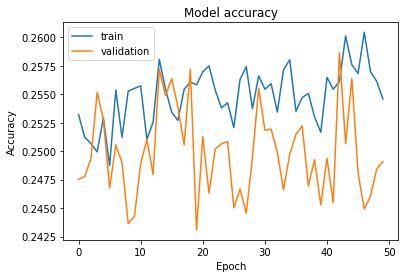

In [44]:
plt.plot(train.history['sparse_categorical_accuracy'])
plt.plot(train.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [45]:
test = model_functional.evaluate(test_X, test_y)


424/424 [==============================] - 0s 1ms/step - loss: 6.0059 - sparse_categorical_accuracy: 0.2476


---

In [12]:
inputs = tf.keras.layers.Input(shape=(train_X.shape[1],))
classification_out = tf.keras.layers.Dense(4, activation='softmax')(inputs)

model_functional = tf.keras.models.Model(inputs=inputs, outputs = classification_out)
model_functional.compile(loss='SparseCategoricalCrossentropy', 
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                         metrics=['sparse_categorical_accuracy'])


In [13]:
train = model_functional.fit(train_X, train_y, epochs=500, validation_split=0.2)


Epoch 1/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3961 - sparse_categorical_accuracy: 0.2541 - val_loss: 1.3910 - val_sparse_categorical_accuracy: 0.2474
Epoch 2/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3906 - sparse_categorical_accuracy: 0.2540 - val_loss: 1.3885 - val_sparse_categorical_accuracy: 0.2466
Epoch 3/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3892 - sparse_categorical_accuracy: 0.2573 - val_loss: 1.3918 - val_sparse_categorical_accuracy: 0.2506
Epoch 4/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3898 - sparse_categorical_accuracy: 0.2498 - val_loss: 1.3894 - val_sparse_categorical_accuracy: 0.2506
Epoch 5/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3889 - sparse_categorical_accuracy: 0.2545 - val_loss: 1.3899 - val_sparse_categorical_accuracy: 0.2477
Epoch 6/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3890 -

1355/1355 [==============================] - 2s 2ms/step - loss: 1.3841 - sparse_categorical_accuracy: 0.2692 - val_loss: 1.3922 - val_sparse_categorical_accuracy: 0.2494
Epoch 90/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3843 - sparse_categorical_accuracy: 0.2722 - val_loss: 1.3941 - val_sparse_categorical_accuracy: 0.2494
Epoch 91/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3840 - sparse_categorical_accuracy: 0.2732 - val_loss: 1.3896 - val_sparse_categorical_accuracy: 0.2439
Epoch 92/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3843 - sparse_categorical_accuracy: 0.2708 - val_loss: 1.3915 - val_sparse_categorical_accuracy: 0.2434
Epoch 93/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3845 - sparse_categorical_accuracy: 0.2717 - val_loss: 1.3898 - val_sparse_categorical_accuracy: 0.2484
Epoch 94/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3842 - sparse

1355/1355 [==============================] - 2s 2ms/step - loss: 1.3823 - sparse_categorical_accuracy: 0.2740 - val_loss: 1.3920 - val_sparse_categorical_accuracy: 0.2548
Epoch 178/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3828 - sparse_categorical_accuracy: 0.2760 - val_loss: 1.3915 - val_sparse_categorical_accuracy: 0.2459
Epoch 179/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3829 - sparse_categorical_accuracy: 0.2778 - val_loss: 1.3925 - val_sparse_categorical_accuracy: 0.2441
Epoch 180/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3825 - sparse_categorical_accuracy: 0.2759 - val_loss: 1.4016 - val_sparse_categorical_accuracy: 0.2511
Epoch 181/500
1355/1355 [==============================] - 2s 1ms/step - loss: 1.3825 - sparse_categorical_accuracy: 0.2764 - val_loss: 1.3925 - val_sparse_categorical_accuracy: 0.2461
Epoch 182/500
1355/1355 [==============================] - 2s 1ms/step - loss: 1.3823 - s

1355/1355 [==============================] - 2s 2ms/step - loss: 1.3817 - sparse_categorical_accuracy: 0.2805 - val_loss: 1.3947 - val_sparse_categorical_accuracy: 0.2499
Epoch 266/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3818 - sparse_categorical_accuracy: 0.2782 - val_loss: 1.3919 - val_sparse_categorical_accuracy: 0.2497
Epoch 267/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3814 - sparse_categorical_accuracy: 0.2781 - val_loss: 1.3927 - val_sparse_categorical_accuracy: 0.2535
Epoch 268/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3817 - sparse_categorical_accuracy: 0.2768 - val_loss: 1.3954 - val_sparse_categorical_accuracy: 0.2536
Epoch 269/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3812 - sparse_categorical_accuracy: 0.2806 - val_loss: 1.3921 - val_sparse_categorical_accuracy: 0.2485
Epoch 270/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3818 - s

1355/1355 [==============================] - 2s 2ms/step - loss: 1.3807 - sparse_categorical_accuracy: 0.2818 - val_loss: 1.3930 - val_sparse_categorical_accuracy: 0.2467
Epoch 354/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3808 - sparse_categorical_accuracy: 0.2820 - val_loss: 1.3945 - val_sparse_categorical_accuracy: 0.2447
Epoch 355/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3809 - sparse_categorical_accuracy: 0.2822 - val_loss: 1.3936 - val_sparse_categorical_accuracy: 0.2458
Epoch 356/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3806 - sparse_categorical_accuracy: 0.2839 - val_loss: 1.3952 - val_sparse_categorical_accuracy: 0.2498
Epoch 357/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3805 - sparse_categorical_accuracy: 0.2809 - val_loss: 1.3946 - val_sparse_categorical_accuracy: 0.2445
Epoch 358/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3804 - s

1355/1355 [==============================] - 2s 2ms/step - loss: 1.3800 - sparse_categorical_accuracy: 0.2848 - val_loss: 1.3930 - val_sparse_categorical_accuracy: 0.2518
Epoch 442/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3797 - sparse_categorical_accuracy: 0.2841 - val_loss: 1.3989 - val_sparse_categorical_accuracy: 0.2495
Epoch 443/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3798 - sparse_categorical_accuracy: 0.2835 - val_loss: 1.4031 - val_sparse_categorical_accuracy: 0.2534
Epoch 444/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3805 - sparse_categorical_accuracy: 0.2843 - val_loss: 1.3966 - val_sparse_categorical_accuracy: 0.2537
Epoch 445/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3796 - sparse_categorical_accuracy: 0.2833 - val_loss: 1.3987 - val_sparse_categorical_accuracy: 0.2558
Epoch 446/500
1355/1355 [==============================] - 2s 2ms/step - loss: 1.3800 - s

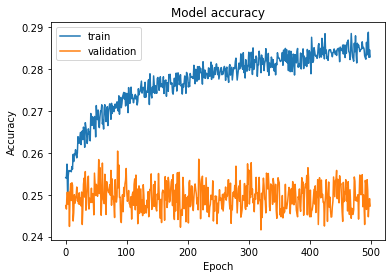

In [14]:
plt.plot(train.history['sparse_categorical_accuracy'])
plt.plot(train.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

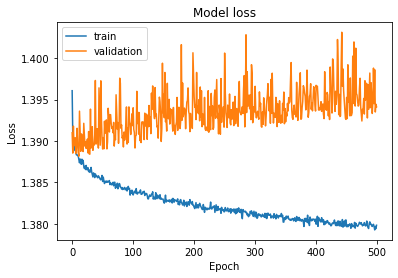

In [15]:
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
del train, model

---

In [16]:
inputs = tf.keras.layers.Input(shape=(train_X.shape[1],))
hidden_1_out = tf.keras.layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(inputs)
dropout = tf.keras.layers.Dropout(0.2)(hidden_1_out)
hidden_2_out = tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(dropout)
classification_out = tf.keras.layers.Dense(4, activation='softmax')(hidden_2_out)

model_functional = tf.keras.models.Model(inputs=inputs, outputs = classification_out)
model_functional.compile(loss='SparseCategoricalCrossentropy', 
                         optimizer='adam', 
                         metrics=['sparse_categorical_accuracy'])


In [17]:
train = model_functional.fit(train_X, train_y, epochs=50, validation_split=0.2)


Epoch 1/50
1355/1355 [==============================] - 6s 4ms/step - loss: 1.4821 - sparse_categorical_accuracy: 0.2481 - val_loss: 1.4271 - val_sparse_categorical_accuracy: 0.2470
Epoch 2/50
1355/1355 [==============================] - 5s 4ms/step - loss: 1.4098 - sparse_categorical_accuracy: 0.2500 - val_loss: 1.3977 - val_sparse_categorical_accuracy: 0.2506
Epoch 3/50
1355/1355 [==============================] - 5s 4ms/step - loss: 1.3935 - sparse_categorical_accuracy: 0.2479 - val_loss: 1.3897 - val_sparse_categorical_accuracy: 0.2471
Epoch 4/50
1355/1355 [==============================] - 5s 4ms/step - loss: 1.3894 - sparse_categorical_accuracy: 0.2436 - val_loss: 1.3883 - val_sparse_categorical_accuracy: 0.2471
Epoch 5/50
1355/1355 [==============================] - 5s 4ms/step - loss: 1.3875 - sparse_categorical_accuracy: 0.2499 - val_loss: 1.3872 - val_sparse_categorical_accuracy: 0.2482
Epoch 6/50
1355/1355 [==============================] - 5s 4ms/step - loss: 1.3870 - spars

Epoch 46/50
1355/1355 [==============================] - 5s 4ms/step - loss: 1.3869 - sparse_categorical_accuracy: 0.2507 - val_loss: 1.3869 - val_sparse_categorical_accuracy: 0.2482
Epoch 47/50
1355/1355 [==============================] - 5s 4ms/step - loss: 1.3869 - sparse_categorical_accuracy: 0.2452 - val_loss: 1.3868 - val_sparse_categorical_accuracy: 0.2482
Epoch 48/50
1355/1355 [==============================] - 5s 4ms/step - loss: 1.3869 - sparse_categorical_accuracy: 0.2506 - val_loss: 1.3868 - val_sparse_categorical_accuracy: 0.2543
Epoch 49/50
1355/1355 [==============================] - 5s 4ms/step - loss: 1.3869 - sparse_categorical_accuracy: 0.2485 - val_loss: 1.3868 - val_sparse_categorical_accuracy: 0.2543
Epoch 50/50
1355/1355 [==============================] - 5s 4ms/step - loss: 1.3869 - sparse_categorical_accuracy: 0.2498 - val_loss: 1.3870 - val_sparse_categorical_accuracy: 0.2471
